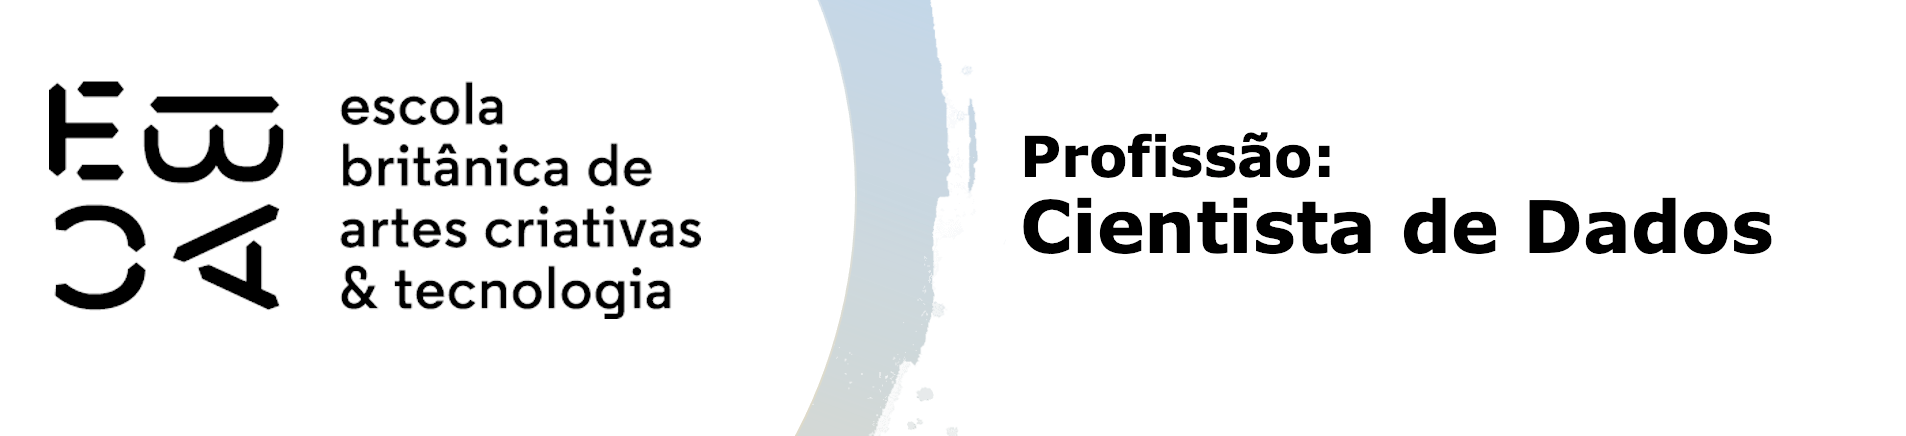

# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [2]:
penguins = sns.load_dataset('penguins')
penguins.index.name='id'

# item 1 e 2 - selecionando quantitativas numéricas da base de penguins e eliminando valores faltantes.
penguins_num = penguins.select_dtypes(include = 'number').dropna() 



In [3]:
#item 3 - padronizando as variáveis para média zero e desvio padrão 1

peng_num_standardized =StandardScaler().fit_transform(penguins_num) 

In [6]:
# Agrupamento Hierárquico em 3 grupos

clusters_3 = AgglomerativeClustering(
    linkage = 'complete', distance_threshold = None, n_clusters=3
    ).fit(peng_num_standardized)

clusters_3
                        

AgglomerativeClustering(linkage='complete', n_clusters=3)

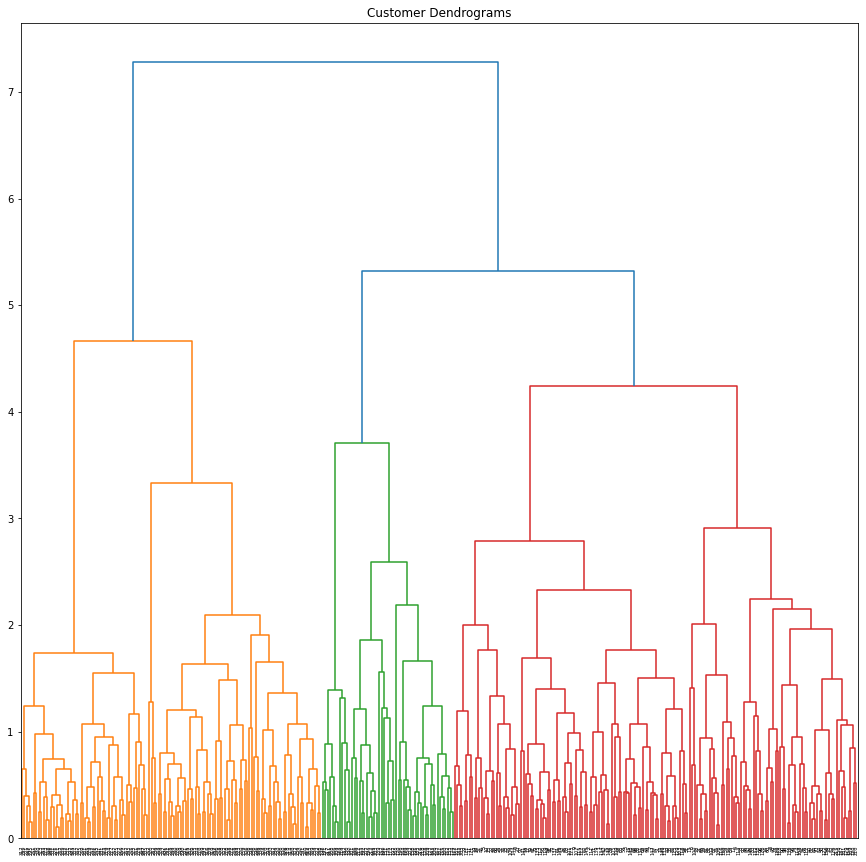

In [8]:
# Fazendo Dendrograma na base de dados do penguins_padronizado

plt.figure(figsize=(15, 15))
plt.title("Customer Dendrograms")
dendrograma = shc.dendrogram(shc.linkage(peng_num_standardized, method='complete'))

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [9]:
penguins_num['group'] = clusters_3.labels_

In [10]:
penguins_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,group
id,,,,,
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,1


In [15]:
penguins = penguins.merge(penguins_num['group'], how = 'left', on = 'id')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,group_x,group_y,group
id,,,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0,1.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0,1.0,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0,1.0,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0,1.0,1.0


In [19]:
# Quantos pinguins de cada espécie há em cada grupo?

pd.crosstab(penguins['species'], penguins['group'])

group,0.0,1.0,2.0
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


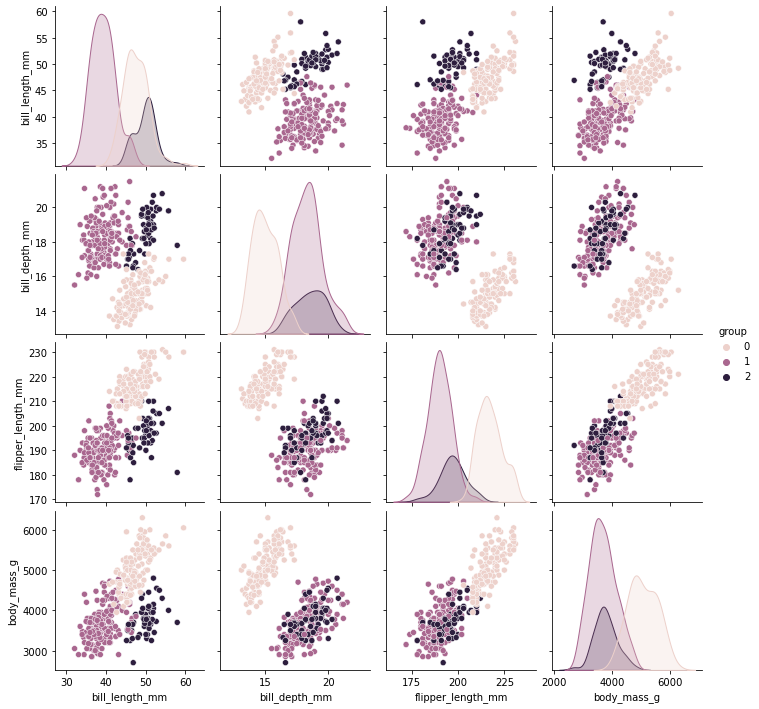

In [21]:
# descrevendo as variáveis quantitativas de cada grupo, utilizando pairplot

sns.pairplot(data = penguins_num, hue = 'group')

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [22]:
# Agrupamento Hierárquico em 6 grupos

clusters_6 = AgglomerativeClustering(
    linkage = 'complete', distance_threshold = None, n_clusters=6
    ).fit(peng_num_standardized)

clusters_6

AgglomerativeClustering(linkage='complete', n_clusters=6)

In [23]:
penguins_num['group'] = clusters_6.labels_
penguins_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,group
id,,,,,
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,2


In [29]:
penguins = penguins.loc[:,'species':'sex']
penguins = penguins.merge(penguins_num['group'], how = 'left', on = 'id')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,group
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0


In [30]:
# Quantos pinguins de cada espécie há em cada grupo?

pd.crosstab(penguins['species'], penguins['group'])

group,0.0,1.0,2.0,3.0,4.0,5.0
species,,,,,,
Adelie,0,91,60,0,0,0
Chinstrap,0,5,9,0,42,12
Gentoo,71,0,0,52,0,0


In [35]:
#Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?

pd.crosstab([penguins['species'], penguins['sex']], penguins['group'])

group             0.0  1.0  2.0  3.0  4.0  5.0
species   sex                                 
Adelie    Female    0   69    4    0    0    0
          Male      0   18   55    0    0    0
Chinstrap Female    0    5    9    0   20    0
          Male      0    0    0    0   22   12
Gentoo    Female    9    0    0   49    0    0
          Male     61    0    0    0    0    0

In [36]:
#Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

Sim, o agrupamento hierárquico em 6 grupos capturou algum padrão natural dos dados. Observa-se o seguinte:

- Grupo 0 - capturou mais a espécie Gentoo macho;
- Grupo 1 - capturou mais a espécie Adelie fêmea;
- Grupo 2 - capturou mais a espécie Adelie macho;
- Grupo 3 - capturou somente a espécie Gentoo fêmea;
- Grupo 4 - capturou somente a espécie Chinstrap, tanto fêmea e macho (praticamente 50%)
- Grupo 5 - capturou somente a espécie Chinstrap macho.